# Importing Essential Libraries.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# 1.Loading the Iris Data Set Into Python.

In [35]:
ird=pd.read_excel(r'C:\Users\Lenovo\OneDrive\Desktop\ICT Academy\CS07 iris.xls')
ird.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Necessory Pre-Processing On Data

## a. Checking NaN value is Data set.

In [36]:
ird.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

**Interpretation**<br>
Here it is clear that the there is 7 missing values in Sepel Length.<br>
And 6 missing value is in Sepel width.<br>
Also 6 missing values in Petal Width.<br>

## b. Filling The NaN with Mean

Here we use ingeter value of mean to avoid the further complication of float values, that may be very nice to see data set.

In [37]:
ird['SL'].fillna(int(ird['SL'].mean()), inplace=True)
ird['SW'].fillna(int(ird['SW'].mean()), inplace=True)
ird['PL'].fillna(int(ird['PL'].mean()), inplace=True)

## c. Checking further for missing values. 

In [38]:
ird.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

## d. Basic Information about the Data set.

In [39]:
ird.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Which is clear that the Data set has four columns with float value and one object column.<br>

## e. Basic Statistic of Data set.

In [40]:
ird.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.816000,3.047333,3.726000,1.198667
std,0.828525,0.421995,1.731874,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 3. Checking Wheather which classification is best.

### Step 1. Spliting Data Set into Training and Testing Data.

In [41]:
X=ird.iloc[:,[0,1,2,3]].values
y=ird.iloc[:,[4]].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

### Step 2. K Nearest Neighbor Classification.

#### Find the best value of K

In [42]:
acc_values=[]
neighbors=np.arange(3,25)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[1.0,
 1.0,
 0.9473684210526315,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

**Interpretation**<br>
Among the 15 values of K, except the third value of k all other have good accuracy score.

#### By giving the value of KNN Model.

In [44]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print('Accuracy of KNN Model is-''%.2f'% accuracy_score(y_test,y_pred))
print('Confusion matrix of KNN Model is',confusion_matrix(y_test,y_pred))

Accuracy of KNN Model is-1.00
Confusion matrix of KNN Model is [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


#### Step 3. Desition Tree.

In [58]:
dtirs=pd.read_excel(r'C:\Users\Lenovo\OneDrive\Desktop\ICT Academy\CS07 iris.xls')
dtirs['SL'].fillna(int(dtirs['SL'].mean()), inplace=True)
dtirs['SW'].fillna(int(dtirs['SW'].mean()), inplace=True)
dtirs['PL'].fillna(int(dtirs['PL'].mean()), inplace=True)
dtirs.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [59]:
X=dtirs.iloc[:,[0,1,2,3]].values
y=dtirs.iloc[:,[4]].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [60]:
dtfit=DecisionTreeClassifier(max_depth=3,random_state=42)
dtfit.fit(X_train,y_train)
y_pred1=dtfit.predict(X_test)
print('The Accuracy of Decision Tree Model is:',accuracy_score(y_test,y_pred1))
print('Confusion matrix of KNN Model is',confusion_matrix(y_test,y_pred1))

The Accuracy of Decision Tree Model is: 1.0
Confusion matrix of KNN Model is [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [61]:
dtfit.feature_importances_

array([0.        , 0.        , 0.06677384, 0.93322616])

Which is we can say Sepal length and Sepel Width has no importance in order to build this Decision tree.<br>
Also we can see that accuracy are good and confusion matrix is same as KNN model.

#### Applying the decision tree.

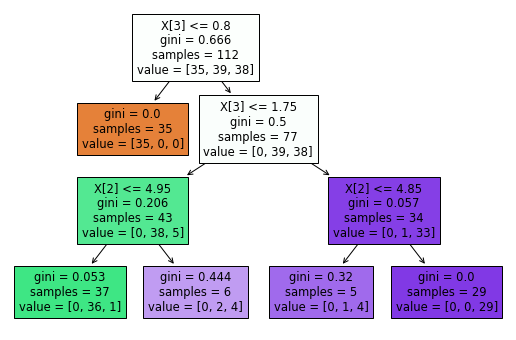

In [57]:
plt.figure(figsize=(9,6))
plot_tree(dtfit,filled=True);

#### Step 4. Support Vector Model.


In [99]:
from sklearn.metrics import accuracy_score
svmfit=SVC()
svmfit.fit(X_train,y_train)

SVC()

In [100]:
y_pred2=svmfit.predict(X_test)


In [103]:
print('The Accuracy of SVM Model is:',accuracy_score(y_pred2,y_test))
confusion_matrix(y_test,y_pred2)

The Accuracy of SVM Model is: 1.0


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

#### Step 5. Random forest.


In [105]:
from sklearn.metrics import accuracy_score
rffit=RandomForestClassifier(n_estimators=100)
rffit.fit(X_train,y_train)
y_pred3=rffit.predict(X_test)
print('The Accuracy of SVM Model is:',accuracy_score(y_pred3,y_test))
confusion_matrix(y_test,y_pred3)

The Accuracy of SVM Model is: 1.0


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

**Interpretation**
Using any model is same because the accuracy score and confusion matrix. Because all model predictive is prefect and good.